In [1]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph

In [ ]:
==30==

In [ ]:
n차 미분까지 자동으로 계산
1. Variable클래스의 __init__메서드
data와 grad인스턴스 변수는 각각 순전파와 역전파 계산시 사용
모두 ndarray인스턴스를 저장
2. Function클래스의 __call__메서드
Variable과 Function의 관계가 만들어진다.
> 변수에서 함수로의 연결은 set_creator메서드가 만들어준다.
연결을 만드는 이유는 미분값을 역방향으로 진행해서

In [ ]:
역전파 로직) Variable클래스의 backward메서드에서 구현
Variable의 인스턴스 변수인 grad를 리스트로 모음
backward메서드에는 ndarray 인스턴스가 담긴 리스트가 전달됨

In [ ]:
==31==

In [ ]:
계산 연결은 Function클래스의 __call__메서드에서 만들어진다.
순전파와 역전파는 Fuction클래스를 상속한 클래스의 forward와 backward메서드로 처리
>>문제점: 역전파를 계산할때는 연결이 만들어지지않는다.

In [1]:
#sin함수의 미분을 구하기 위한 계산 그래프
gx.backward()를 호출하여 gx의 x에 대한 미분을 계산 할 수 있다.
gx는 y = sin(x)의 미분이기 때문에 gx.backward()를 호출함으로써 x의 2차 미분에 해당.
y에서 backward해서 1차 gx에서 backward해서 2차

In [2]:
#순전파 계산연결
순전파일때 연결이 만들어짐
Variable인스턴스는 input, output 연결
ndarray는 계산값
sinx를 미분했을때 cosx로 끝내지말고 Variable인스턴스를 사용해서 한번 더 미분하는 -sinx로

In [3]:
#sin 클래스의 순전파와 역전파의 계산 그래프
 Variable 클래스의 grad가 Variable 인스턴스를 참조
 미분값을 나타내는 gy가 Variable 인스턴스가 된 덕분에 gy를 사용한 계산에도 연결 만듦
sin 클래스에서 backward()메서드 구현시 미분을 계산하는 코드 추가시 gx = gy*cos(x)코드의 변수가 모두 Variable 인스턴스로 변경

In [ ]:
==32==

In [4]:
이제부터 core.py에 구현
Variable 클래스의 소스 변경 > 미분값을 자동으로 저장하는 코드에서 self.grad가 Variable인스턴스를 담게됨.

In [ ]:
Add.Mul,Neg,Sub,Div,Pow 클래스의 backward메서드 수정
#함수 클래스의 역전파구현
add클래스의 역전파가 하는일은 출력쪽에서 전해지는 미분값을 입력 쪽으로 전달
mul클래스의 역전파는 gy*x1이 실행되는 뒤편에서 Mul클래스의 순전파가 호출되면서 그때 Function.__call__이 호출되고,그 안에서 그래프가 만들어짐

In [ ]:
역전파가 필요없는 경우 비활성모드로 역전파 처리 생략
1회만 한다면 비활성모드 실행
역전파 처리는 with using_config(...)에서 수행

In [ ]:
==33==

In [ ]:
2차 미분을 수동으로 계산하였지만 새로운 Dezero를 사용하여 2차 미분도 자동으로 수행
y = x^4-2x^2 수식 2차 미분 수행
gx = x.grad로 y의 x에 대한 미분값을 꺼낸다.
잘못된 결과는 1차 미분에 2차 미분결과가 더해진값

In [ ]:
backward메서드를 두번 실행하여 자동으로 계산하도록 수정

In [2]:
def f(x):
    y = x ** 4 - 2 * x ** 2
    return y

In [3]:
x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True)
print(x.grad)

gx = x.grad
gx.backward()
print(x.grad)

variable(24.0)
variable(68.0)


In [4]:
x = Variable(np.array(2.0))
y = f(x)
y.backward(create_graph=True)
print(x.grad)

gx = x.grad
x.cleargrad()
gx.backward()
print(x.grad)

variable(24.0)
variable(44.0)


In [5]:
x = Variable(np.array(2.0))
iters = 10

In [6]:
for i in range(iters):
    print(i, x)

    y = f(x)
    x.cleargrad()
    y.backward(create_graph=True)

    gx = x.grad
    x.cleargrad()
    gx.backward()
    gx2 = x.grad

    x.data -= gx.data / gx2.data

0 variable(2.0)
1 variable(1.4545454545454546)
2 variable(1.1510467893775467)
3 variable(1.0253259289766978)
4 variable(1.0009084519430513)
5 variable(1.0000012353089454)
6 variable(1.000000000002289)
7 variable(1.0)
8 variable(1.0)
9 variable(1.0)


In [ ]:
==34==

In [ ]:
새로운 Dezero함수 추가

In [ ]:
고차 미분에 대응하는 새로운 Sin클래스 구현
gx = gy*cos(x)는 Dezero의 cos함수
gy*cos(x)에는 곱셈 연산자를 오버로드해 놓았기때문에 mul함수가 호출됨

In [ ]:
새로운 Cos클래스와 cos함수 구현
backward메서드에서 구체적인 계산에서 sin함수를 사용

In [ ]:
#sin함수 고차 미분
2,3,4차 미분도 계산
for문으로 역전파 반복 > n차 미분 구함
역전파를 하기전에 x.cleargrad()를 호출하여 미분값을 재설정

In [ ]:
다차원 배열을 입력 받으면 각 원소에 대해 독립적으로 계산함
한 번의 순전파로 원소 200개의 계산이 모두 이뤄진다.

In [15]:
import dezero.functions as F
import matplotlib.pyplot as plt

In [8]:
x = Variable(np.linspace(-7, 7, 200)) #-7부터 7까지 200등분한 배열을 만들어준다
y = F.sin(x)
y.backward(create_graph=True)

In [12]:
logs = [y.data]

In [13]:
for i in range(3):
    logs.append(x.grad.data)
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

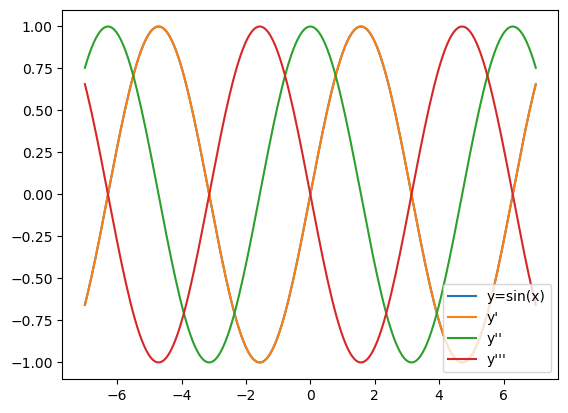

In [16]:
labels = ["y=sin(x)", "y'", "y''", "y'''"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])
plt.legend(loc='lower right')
plt.show()
#파도모양위상이 어긋난 함수

In [ ]:
==35==

In [ ]:
tanh(x)=e^x-e^-e / e^x+e^-x
입력을 -1~1사이의 값으로 변환

(tanh(x))'= 1-y^2

순전파는 np.tanh메서드를 이용
역전파는 gy*(1-y*y)형태로 구현

In [ ]:
for문에서 반복해서 역전파함으로 고차미분을 계산
iters = 0이면 1차 미분, 1이면 2차 미분이 계산되는 방식

In [17]:
x = Variable(np.array(1.0))
y = F.tanh(x)
x.name = 'x'
y.name = 'y'
y.backward(create_graph=True)

In [18]:
iters = 1

In [19]:
for i in range(iters):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

In [20]:
gx = x.grad
gx.name = 'gx' + str(iters + 1)
plot_dot_graph(gx, verbose=False, to_file='tanh.png')

In [ ]:
==36==

In [ ]:
고차 미분을 하기 위해 역전파 수행되는 계산에 대해서도 연결을 만듦

#Double Backpropagation
역전파로 수행한 계산에 대해 다시 역전파수행

#double backprop활용
미분이 포함된 식에서 다시 한번 미분 수행
y'=2x , z=(y')^3 + y =8x^3 +x^2
z' = 24x^2 + 2x
a,b가 정수일 때 f(x0,x1) = b(x1-x0^2)^2+(a-x0)^2

#WGAN-GP논문
최적화하는 식에 기울기가 들어있다.
> 첫번째 역전파를 구할 수 있다
> 함수 L을 계산하고 최적화하기위해 두번째 역전파 수행

In [21]:
x = Variable(np.array(2.0))
y = x ** 2
y.backward(create_graph=True)
gx = x.grad
x.cleargrad()

In [22]:
z = gx ** 3 + y
z.backward()
print(x.grad)

variable(100.0)
